In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, LSTM, Embedding
from sklearn.model_selection import  train_test_split
from sklearn.metrics import classification_report,  accuracy_score

# Exploring Fake news

In [ ]:
fake = pd.read_csv('https://raw.githubusercontent.com/Wassefy/fake_news_dataset/main/data/Fake.csv')

In [ ]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


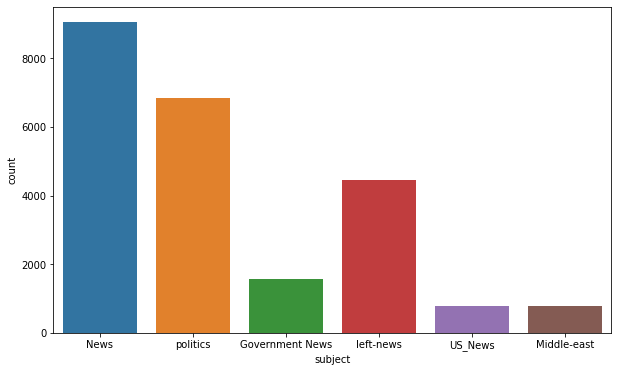

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot('subject', data=fake)

## WordCloud

In [ ]:
text = ''.join(fake['text'].tolist())

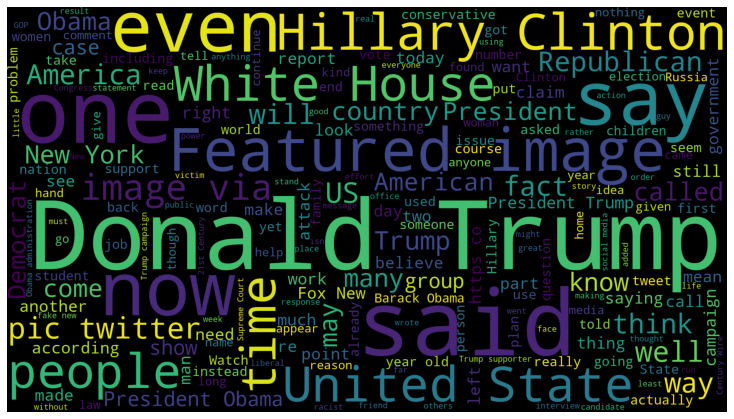

In [ ]:
wordcloud = WordCloud(width = 1920, height = 1080).generate(text)
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

# Exploring Real News

In [ ]:
real = pd.read_csv('https://raw.githubusercontent.com/Wassefy/fake_news_dataset/main/data/True.csv')

In [ ]:
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
real.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
real['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


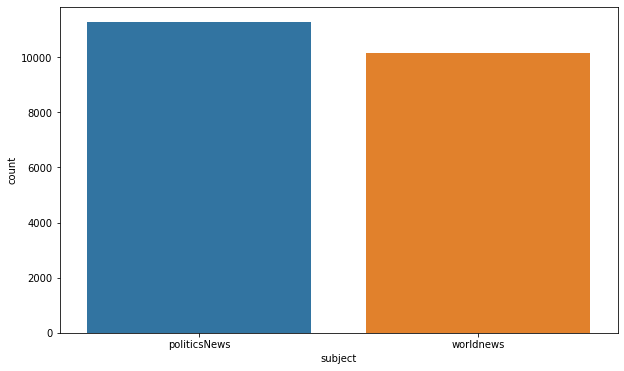

In [ ]:
plt.figure(figsize = (10, 6))
sns.countplot('subject', data = real)

## WordCloud

In [ ]:
rtext = ' '.join(real['text'].tolist())


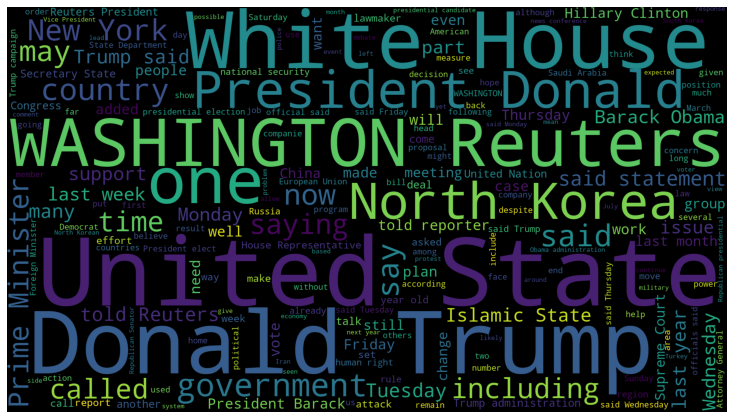

In [ ]:
wordcloud = WordCloud(width = 1920, height = 1080).generate(rtext)
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

 Sự khác nhau giữa tin thật và giả


Tin thật có nguồn xuất bản trong khi tin giả thì không
Nhìn vào dữ liệu ta thấy: 
- Hầu hết các khối văn bản đều có địa chỉ vd như "WASHINGTON(Reuters)"
- Có một số tweets từ chính Twitter
- Rất ít văn bản không chứa bất kỳ thông tin xuất bản nào

# Tiền xử lý dữ liệu.

## Làm sạch dữ liệu

In [ ]:
real.sample(5)

,title,text,subject,date
3393,Trump complicates travel ban case by grumbling...,NEW YORK/WASHINGTON (Reuters) - President Dona...,politicsNews,"June 5, 2017"
18638,Saudi authorities pursue Twitter user over wom...,RIYADH (Reuters) - Saudi Arabia s public prose...,worldnews,"September 30, 2017"
17440,U.S.-backed SDF launch final assault in Syria'...,BEIRUT (Reuters) - U.S.-backed militias in Syr...,worldnews,"October 15, 2017"
3801,Deputy attorney general sees no need for Russi...,WASHINGTON (Reuters) - Deputy U.S. Attorney Ge...,politicsNews,"May 12, 2017"
18968,British police release three more men in Londo...,(Reuters) - British police said on Tuesday the...,worldnews,"September 26, 2017"


In [ ]:
unknown_publishers = []
for index, row in enumerate(real.text.values):
  try:
    record = row.split(' - ', maxsplit = 1)
    record[1]

    assert(len(record[0]) < 260)
  except:
    unknown_publishers.append(index)

In [ ]:
len(unknown_publishers)

35

In [ ]:
real.iloc[unknown_publishers].text

2922     The following statements were posted to the ve...
3488     The White House on Wednesday disclosed a group...
3782     The following statements were posted to the ve...
4358     Neil Gorsuch, President Donald Trump’s appoint...
4465     WASHINGTON The clock began running out this we...
5290     The following statements were posted to the ve...
5379     The following statements were posted to the ve...
5412     The following statements were posted to the ve...
5504     The following statements were posted to the ve...
5538     The following statements were posted to the ve...
5588     The following statements were posted to the ve...
5593     The following statements were posted to the ve...
5761     The following bullet points are from the U.S. ...
5784     Federal appeals court judge Neil Gorsuch, the ...
6026     The following bullet points are from the U.S. ...
6184     The following bullet points are from the U.S. ...
6660     Republican members of Congress are complaining.

In [ ]:
publisher = []
tmp_text = []

for index, row in  enumerate(real.text.values):
  if index in unknown_publishers:
    tmp_text.append(row)
    publisher.append('Unknown')

  else:
    record = row.split( ' - ', maxsplit = 1)
    publisher.append(record[0].strip())
    tmp_text.append(record[1].strip())

In [ ]:
real['publisher'] = publisher
real['text'] = tmp_text 

In [ ]:
real.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [ ]:
real.shape

(21417, 5)

In [ ]:
empty_fake_index = [index for index,text in enumerate(fake.text.tolist()) if str(text).strip() == ""]

In [ ]:
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [ ]:
real['text'] = real['title'] + " " + real['text']
fake['text'] = fake['title'] + " " + fake['text']

In [ ]:
real['text'] = real['text'].apply(lambda x:str(x).lower())
fake['text'] = fake['text'].apply(lambda x:str(x).lower())


## 

In [ ]:
real['class']  = 1
fake['class']  = 0


In [ ]:
real = real[['text', 'class']]
fake = fake[['text', 'class']]


In [ ]:
data = real.append(fake, ignore_index= True)

In [ ]:
data.sample(5)

,text,class
29364,this conservative wants to let scalia vote fr...,0
21569,trump is literally sabotaging the case agains...,0
33905,hillary mentions support for country she and b...,0
30534,flashback: cnn host concerned working american...,0
40770,unreal video: white guy kidnapped and assaulte...,0


In [ ]:
def remove_special_char(x):
  x = re.sub(r'[^w\ ]+', "", x)
  x = ' '.join(x.split())
  return x

In [ ]:
!pip install spacy==2.2.3
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4==4.9.1
!pip install textblob==0.15.3

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-5u2kn0oo
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-5u2kn0oo
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-cp37-none-any.whl size=11759 sha256=7dc92312eec7027324f0d38f445c8429d881c9d69f623bdb132a1dabe7d62e01
  Stored in directory: /tmp/pip-ephem-wheel-cache-i0wmpypf/wheels/a8/18/22/90afa4bd43247fb9a75b710a4a3fcd94966c022ce9e3c7d0a6
Successfully built preprocess-kgptalkie


In [ ]:
import preprocess_kgptalkie as ps
ps.remove_special_chars('this ,. @ # is  gre@t')

'this is gret'

In [ ]:
data['text'] =  data['text'].apply(lambda x: ps.remove_special_chars(x))

In [ ]:
data.head()

,text,class
0,as us budget fight looms republicans flip thei...,1
1,us military to accept transgender recruits on ...,1
2,senior us republican senator let mr mueller do...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge much more...,1


## Vector hóa văn bản - Word2Vec

In [ ]:
import gensim


In [ ]:
y = data['class'].values

In [ ]:
X = [d.split() for d in data['text'].tolist()]

In [ ]:
print(X[0])

['as', 'us', 'budget', 'fight', 'looms', 'republicans', 'flip', 'their', 'fiscal', 'script', 'the', 'head', 'of', 'a', 'conservative', 'republican', 'faction', 'in', 'the', 'us', 'congress', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts', 'called', 'himself', 'a', 'fiscal', 'conservative', 'on', 'sunday', 'and', 'urged', 'budget', 'restraint', 'in', '2018', 'in', 'keeping', 'with', 'a', 'sharp', 'pivot', 'under', 'way', 'among', 'republicans', 'us', 'representative', 'mark', 'meadows', 'speaking', 'on', 'cbs', 'face', 'the', 'nation', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'january', 'when', 'they', 'return', 'from', 'the', 'holidays', 'on', 'wednesday', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', 'a', 'fight', 'likely', 'to', 'be', 'linked', 'to', 'other', 'issues',

In [ ]:
DIM = 100
w2v_model = gensim.models.Word2Vec(sentences = X, size = DIM, window  = 10, min_count = 1 )

In [ ]:
len(w2v_model.wv.vocab)

231835

In [ ]:
w2v_model.wv['win']

array([ 2.3898001e+00, -3.7767971e+00, -1.6980149e-03,  2.4922330e+00,
        1.5885783e+00, -3.8620744e+00,  3.8850670e+00,  8.6975090e-02,
        3.5903013e+00, -1.5662980e+00,  2.0286758e+00, -3.6820459e+00,
       -2.1367450e+00,  3.2262483e-01,  2.7471094e+00,  8.0801445e-01,
       -3.6480197e-01,  4.2651601e+00,  2.6794236e+00,  1.8450551e+00,
        2.0620334e+00,  3.4152641e+00, -5.1296866e-01,  6.0837144e-01,
        1.8517587e+00, -7.9450577e-01,  7.5420451e-01, -7.5850703e-02,
        7.0374632e+00, -2.7794878e+00,  1.3402392e+00,  8.8726616e-01,
        1.0736222e+00, -1.2523135e+00, -1.2087290e+00,  1.6282198e+00,
       -7.0828386e-02, -5.0004356e-02, -2.6391110e-01, -2.9346073e+00,
        3.5560870e+00,  4.0290565e+00, -9.3422812e-01,  3.2378263e+00,
       -1.6343750e-01, -3.2871709e+00,  2.2559851e-01, -1.4493595e+00,
        5.6278510e+00, -1.4177102e+00,  1.7273725e+00,  4.2972855e-02,
        4.7864327e+00,  1.8816553e+00,  2.1082420e+00,  6.5442872e+00,
      

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [ ]:
X = tokenizer.texts_to_sequences(X)

In [ ]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'a': 4,
 'and': 5,
 'in': 6,
 'that': 7,
 'on': 8,
 'for': 9,
 's': 10,
 'is': 11,
 'he': 12,
 'said': 13,
 'trump': 14,
 'it': 15,
 'with': 16,
 'was': 17,
 'as': 18,
 'his': 19,
 'by': 20,
 'has': 21,
 'be': 22,
 'have': 23,
 'not': 24,
 'from': 25,
 'this': 26,
 'at': 27,
 'are': 28,
 'who': 29,
 'us': 30,
 'an': 31,
 'they': 32,
 'i': 33,
 'but': 34,
 'we': 35,
 'would': 36,
 'president': 37,
 'about': 38,
 'will': 39,
 'their': 40,
 'had': 41,
 'you': 42,
 't': 43,
 'been': 44,
 'were': 45,
 'people': 46,
 'more': 47,
 'or': 48,
 'after': 49,
 'which': 50,
 'she': 51,
 'her': 52,
 'one': 53,
 'if': 54,
 'its': 55,
 'out': 56,
 'all': 57,
 'what': 58,
 'state': 59,
 'when': 60,
 'new': 61,
 'also': 62,
 'up': 63,
 'there': 64,
 'over': 65,
 'no': 66,
 'house': 67,
 'donald': 68,
 'our': 69,
 'states': 70,
 'clinton': 71,
 'obama': 72,
 'government': 73,
 'can': 74,
 'just': 75,
 'him': 76,
 'so': 77,
 'than': 78,
 'republican': 79,
 'other': 80,
 'so

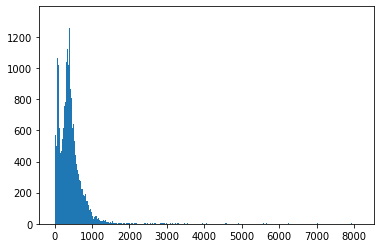

In [ ]:
plt.hist([len(x) for x in X], bins =700 )
plt.show()

In [ ]:
nos = np.array([len(x) for x in X])
len(nos[nos>1000])

1580

In [ ]:
maxlen = 1000
X = pad_sequences(X, maxlen = maxlen)

In [ ]:
len(X[101])

1000

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
vocab = tokenizer.word_index

In [ ]:
def get_weight_matrix(model):
  weight_matrix = np.zeros((vocab_size, DIM))

  for word, i in vocab.items():
    weight_matrix[i] = model.wv[word]

  return weight_matrix

In [ ]:
embedding_vector = get_weight_matrix(w2v_model)

In [ ]:
embedding_vector.shape 

(231836, 100)

# Train Set and Test Set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Model

In [ ]:
model = Sequential([
    Embedding(vocab_size, output_dim = DIM,
              weights = [embedding_vector],
              input_length = maxlen,
              trainable = False),
    LSTM(units = 128),
    Dense(1, activation = 'sigmoid')              
])

In [ ]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'Adam',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 100)         23183600  
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 23,300,977
Trainable params: 117,377
Non-trainable params: 23,183,600
_________________________________________________________________


In [ ]:
history = model.fit(X_train,y_train, epochs = 5, validation_split = 0.3)

Epoch 1/5
737/737 [==============================] - 48s 54ms/step - loss: 0.1600 - accuracy: 0.9402 - val_loss: 0.1239 - val_accuracy: 0.9531
Epoch 2/5
737/737 [==============================] - 39s 53ms/step - loss: 0.0647 - accuracy: 0.9779 - val_loss: 0.0526 - val_accuracy: 0.9847
Epoch 3/5
737/737 [==============================] - 39s 53ms/step - loss: 0.0350 - accuracy: 0.9886 - val_loss: 0.0393 - val_accuracy: 0.9867
Epoch 4/5
737/737 [==============================] - 39s 52ms/step - loss: 0.0216 - accuracy: 0.9932 - val_loss: 0.0384 - val_accuracy: 0.9877
Epoch 5/5
737/737 [==============================] - 38s 52ms/step - loss: 0.0160 - accuracy: 0.9949 - val_loss: 0.0218 - val_accuracy: 0.9925


In [ ]:
!wget https://raw.githubusercontent.com/Wassefy/tensorflow/main/Extras/helper_functions.py


--2021-06-29 10:22:04--  https://raw.githubusercontent.com/Wassefy/tensorflow/main/Extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10234 (10.0K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   9.99K  --.-KB/s    in 0s      

2021-06-29 10:22:04 (92.8 MB/s) - ‘helper_functions.py’ saved [10234/10234]



In [ ]:
from helper_functions import plot_loss_curves


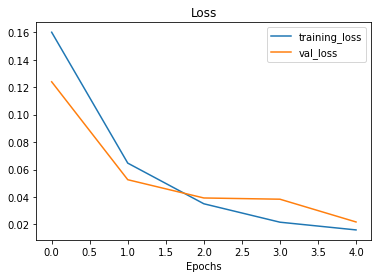

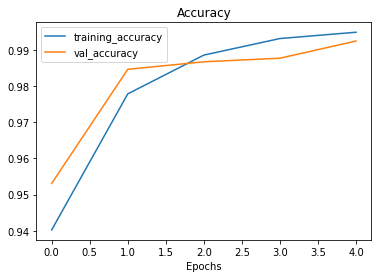

In [ ]:
plot_loss_curves(history)

# Dự báo

In [ ]:
y_pred = (model.predict(X_test) >= 0.5).astype(int)

In [ ]:
y_pred[:5]

array([[0],
       [1],
       [0],
       [1],
       [0]])

In [ ]:
accuracy_score(y_test, y_pred)

0.9933184855233853

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5808
           1       0.99      1.00      0.99      5417

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [ ]:
x_ex = ['This is a hot news']
x_ex = tokenizer.texts_to_sequences(x_ex)
x_ex = pad_sequences(x_ex, maxlen = maxlen)

In [ ]:
(model.predict(x_ex) >= 0.5).astype(int)

array([[0]])

In [ ]:
real_ex = ['Vietnam recorded 94 new local Covid-19 cases Tuesday noon, and HCMC continued to account for more than half, the Health Ministry announced. ']
real_ex = tokenizer.texts_to_sequences(real_ex)
real_ex = pad_sequences(real_ex, maxlen = maxlen)

In [ ]:
(model.predict(real_ex) >= 0.5).astype(int)

array([[1]])